# Aplicando Python para análisis de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="300px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

# 1. Descarga, manejo y análisis de datos
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:

- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: `conda install yfinance`;

otra forma, desde el notebook
- `!pip install yfinance -y`

- una vez finalice la instalación correr el comando: `conda list`, y buscar que sí se haya instalado yfinance


In [42]:
%pip install yfinance

1445.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip list

1457.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Package            Version
------------------ -----------
altgraph           0.17.2
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
certifi            2024.8.30
charset-normalizer 3.3.2
comm               0.2.2
debugpy            1.8.5
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
frozendict         2.4.4
future             0.18.2
html5lib           1.1
idna               3.10
importlib_metadata 8.5.0
ipykernel          6.29.5
ipython            8.18.1
jedi               0.19.1
jupyter_client     8.6.3
jupyter_core       5.7.2
lxml               5.3.0
macholib           1.15.2
matplotlib-inline  0.1.7
multitasking       0.0.11
nest-asyncio       1.6.0
numpy              2.0.2
packaging          24.1
pandas             2.2.3
parso              0.8.4
peewee             3.17.6
pexpect            4.9.0
pip                21.2.4
platformdirs       4.3.6
prompt_toolkit     3.0.47
psutil             6.0.0
ptyprocess         0.7.0
pure_e

Primero importaremos datos desde un archivo con extensión `.csv`

In [44]:
import numpy as np
import pandas as pd

Ahora lo haremos desde Yahoo Finance

In [39]:
#Descargamos los precios de 'META' desde junio del 2017 a la actualidad

import yfinance as yf

meta_yf=yf.download('META','2017-06-01','2024-03-20')
meta_yf.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.075134,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.148895,16854400


In [40]:
meta_yf.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,491.910004,497.420013,486.809998,496.980011,496.013855,11755300
2024-03-19,488.170013,496.630005,481.279999,496.239990,495.275299,10903100


In [41]:
meta_yf.loc["2017-06-02"]

Open         1.518500e+02
High         1.536300e+02
Low          1.513000e+02
Close        1.536100e+02
Adj Close    1.531489e+02
Volume       1.685440e+07
Name: 2017-06-02 00:00:00, dtype: float64

¿Cómo lucen estos datos?

In [35]:
meta_yf['Adj Close'].plot(grid=True)

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [ ]:
meta_yf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1.711000e+03
mean,226.835488,229.922525,223.945126,226.991970,226.757475,2.331174e+07
std,76.922780,77.776415,76.124841,76.982169,76.921569,1.574945e+07
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06
25%,171.834999,173.349998,169.550003,171.584999,171.403137,1.472220e+07
50%,197.190002,199.589996,194.160004,197.490005,197.280685,1.934310e+07
75%,279.869995,285.540009,277.210007,281.735001,281.436401,2.662075e+07
max,514.190002,523.570007,501.380005,512.190002,512.190002,2.323166e+08


## 1.2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [ ]:
#Primero desfasamos los datos un renglón

meta_yf.shift().head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-02,151.750000,152.289993,150.300003,151.529999,151.369400,14530600.0
2017-06-05,151.850006,153.630005,151.300003,153.610001,153.447189,16854400.0


In [ ]:
meta_yf.shift().tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-15,500.260010,501.350006,488.160004,491.829987,491.829987,12620000.0
2024-03-18,489.010010,491.829987,481.299988,484.100006,484.100006,29141700.0
2024-03-19,491.910004,497.420013,486.809998,496.980011,496.980011,11755300.0


In [ ]:
R=(meta_yf-meta_yf.shift())/meta_yf.shift()
R.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-02,0.000659,0.008799,0.006653,0.013727,0.013727,0.159925
2017-06-05,0.011788,0.007030,0.013946,0.000130,0.000130,-0.257144
2017-06-06,-0.001497,-0.001228,-0.006062,-0.005338,-0.005338,0.074814
2017-06-07,-0.000913,-0.004983,-0.000918,0.002029,0.002029,-0.103321


In [ ]:
R.dropna(inplace=True)
R.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-02,0.000659,0.008799,0.006653,0.013727,0.013727,0.159925
2017-06-05,0.011788,0.007030,0.013946,0.000130,0.000130,-0.257144
2017-06-06,-0.001497,-0.001228,-0.006062,-0.005338,-0.005338,0.074814
2017-06-07,-0.000913,-0.004983,-0.000918,0.002029,0.002029,-0.103321
2017-06-08,0.005285,0.006374,0.004989,0.010384,0.010384,0.475084


In [ ]:
R.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,0.001016,0.000972,0.000973,0.001042,0.001043,0.069613
std,0.025616,0.023646,0.023912,0.026211,0.026211,0.463965
min,-0.255923,-0.243902,-0.256004,-0.263901,-0.263901,-0.646217
25%,-0.011224,-0.009088,-0.009374,-0.010321,-0.010321,-0.195813
50%,0.000888,0.000631,0.001856,0.001053,0.001053,-0.021661
75%,0.013428,0.010697,0.012361,0.013381,0.013381,0.199909
max,0.238803,0.283761,0.225078,0.232824,0.232824,7.087865


<Axes: >

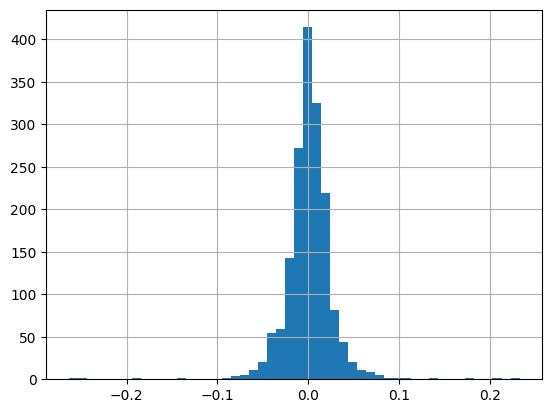

In [ ]:
R['Adj Close'].hist(bins=50)

<Axes: xlabel='Date'>

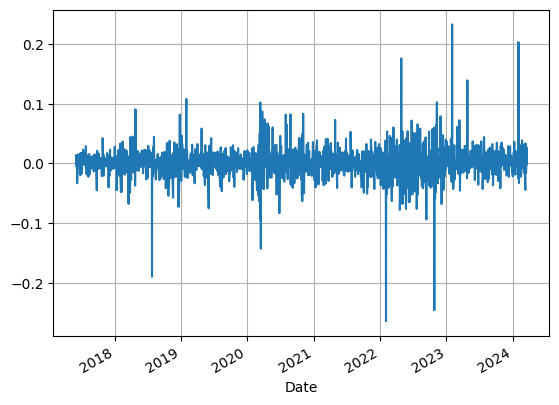

In [ ]:
R['Adj Close'].plot(grid=True)    #La media se conserva a lo largo del tiempo

y la gráfica de los rendimientos se puede obtener como...

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

<Axes: >

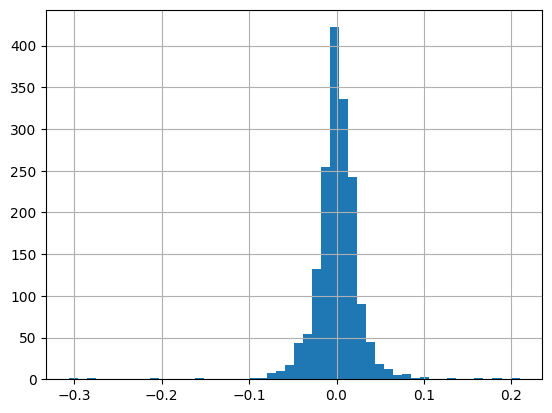

In [ ]:
r=np.log(meta_yf/meta_yf.shift())
r['Adj Close'].hist(bins=50)

<Axes: xlabel='Date'>

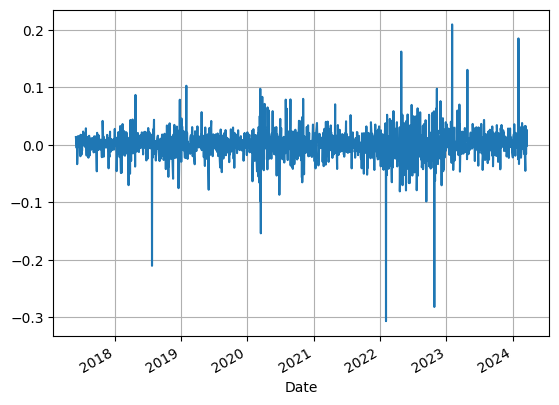

In [ ]:
r['Adj Close'].plot(grid=True)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
# 2. Simulación de escenarios futuros de precios

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [ ]:
names=['RIVN','LCID','RBLX']
start='2021-03-20'

datos=yf.download(names,start)['Close']
datos.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,LCID,RBLX,RIVN
Date,,,
2021-03-22,NaN,70.000000,NaN
2021-03-23,NaN,68.000000,NaN
2021-03-24,NaN,64.500000,NaN
2021-03-25,NaN,67.849998,NaN
2021-03-26,NaN,70.970001,NaN


In [ ]:
datos.tail()

Ticker,LCID,RBLX,RIVN
Date,,,
2024-03-25,2.92,36.660000,10.650
2024-03-26,2.76,37.290001,10.520
2024-03-27,2.97,37.880001,10.990
2024-03-28,2.85,38.180000,10.950
2024-04-01,2.84,37.355000,10.845


<Axes: xlabel='Date'>

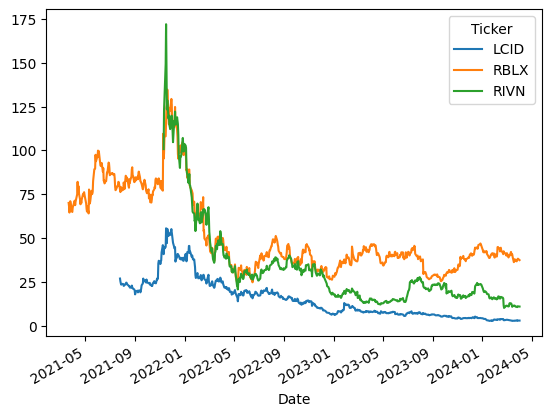

In [ ]:
datos.plot()

In [ ]:
#Calculamos los rendimientos de todas las marcas

R=datos.pct_change().dropna(how="all")    #pct_change() --> Cálculo de rendimientos
                                          #dropna(how="all") --> Elimina las filas que tengan PUROS NaN

R.describe()                              #Mostramos un resúmen estadístico

Ticker,LCID,RBLX,RIVN
count,674.000000,761.000000,598.000000
mean,-0.001922,0.000403,-0.002265
std,0.053921,0.049951,0.053753
min,-0.183363,-0.265075,-0.256010
25%,-0.032576,-0.026129,-0.033060
50%,-0.004855,0.000281,-0.004089
75%,0.024348,0.026258,0.025672
max,0.430000,0.422338,0.220987


Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2018, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2019 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [ ]:
#Simulamos los rendimientos de los siguientes 30 días usando 100,000 escenarios
fechas=pd.date_range('2024-04-02',periods=30)
R_LCID=pd.DataFrame(index=fechas,data=np.random.normal(R['LCID'].mean(),R['LCID'].std(),(30,100000)))
fechas

DatetimeIndex(['2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
               '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09',
               '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
               '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
               '2024-04-30', '2024-05-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
R_LCID.head()

In [ ]:
R_RBLX=pd.DataFrame(index=fechas,data=np.random.normal(R['RBLX'].mean(),R['RBLX'].std(),(30,100000)))
R_RIVN=pd.DataFrame(index=fechas,data=np.random.normal(R['RIVN'].mean(),R['RIVN'].std(),(30,100000)))

## 2.2 Proyección de precios

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el actual año.

In [ ]:
(R_LCID+1).cumprod().head(3)    #cumprod() --> Producto acumulado

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2024-04-02,0.990254,0.976993,0.960765,0.961580,0.998986,0.923894,0.951090,0.973261,1.053711,0.885572,...,1.010783,1.053709,0.933646,1.035764,1.038160,1.036800,0.974742,1.069478,1.009760,0.949705
2024-04-03,0.979544,0.858163,0.960110,0.886670,1.020740,0.938708,0.920812,1.119474,1.071156,0.799629,...,1.042078,1.005918,0.910798,0.946141,1.051373,1.018529,0.893539,1.069782,0.978825,1.042839
2024-04-04,0.989835,0.888471,1.012941,0.952259,1.045595,0.836812,0.875389,1.152435,1.048907,0.815278,...,1.126697,0.974276,0.925829,0.892230,1.100156,1.026297,0.886950,1.098149,0.967855,1.055004


In [ ]:
LCID=datos['LCID'][-1]*(R_LCID+1).cumprod()
RBLX=datos['RBLX'][-1]*(R_RBLX+1).cumprod()
RIVN=datos['RIVN'][-1]*(R_RIVN+1).cumprod()

## 2.3 Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [ ]:
U_LCID=1.05*datos['LCID'][-1]
U_RBLX=1.05*datos['RBLX'][-1]
U_RIVN=1.05*datos['RIVN'][-1]

In [ ]:
#Cuántos escenarios superan el umbral
B_LCID = LCID > U_LCID  #Variables de Bernoulli
B_RBLX = RBLX > U_RBLX
B_RIVN = RIVN > U_RIVN

In [ ]:
P_LCID = B_LCID.mean(axis=1)
P_RBLX = B_RBLX.mean(axis=1)
P_RIVN = B_RIVN.mean(axis=1)

<Axes: >

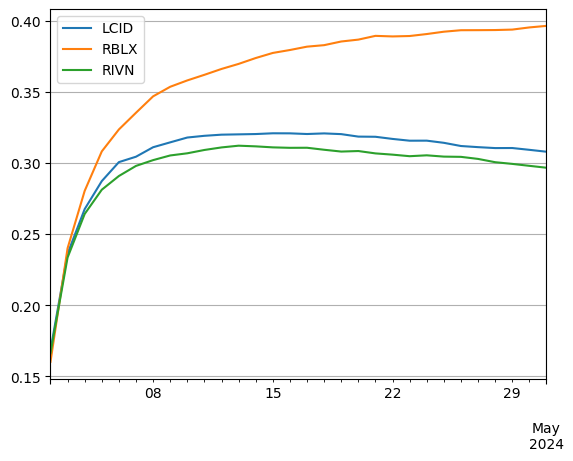

In [ ]:
P_LCID.plot(grid=True,label='LCID',legend=True)
P_RBLX.plot(grid=True,label='RBLX',legend=True)
P_RIVN.plot(grid=True,label='RIVN',legend=True)

En 30 días tenemos una probabilidad cerca de 40% de tener de retornos de al menos 5% para RBLX, arriba del 30% para LCID y debajo del 30% para RIVN.

---

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (Montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.